In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data=pd.read_csv('/content/heart.csv')
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [ ]:
x=data.iloc[:,0:8]
y=data.iloc[:,8:9]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit(x)
dd=sc.transform(x)
print(data)
print(dd)
print(x)

StandardScaler()
[[ 0.9521966   0.68100522  1.97312292 ...  2.394438   -1.00583187
   0.01544279]
 [-1.91531289  0.68100522  1.00257707 ... -0.41763453  0.89896224
   1.63347147]
 [-1.47415758 -1.46841752  0.03203122 ... -0.41763453 -1.00583187
   0.97751389]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ...  2.394438    0.89896224
  -0.37813176]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.41763453  0.89896224
  -1.51512489]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.41763453 -1.00583187
   1.0649749 ]]
     age  sex  cp  trestbps  chol  fbs  restecg  thalach
0     63    1   3       145   233    1        0      150
1     37    1   2       130   250    0        1      187
2     41    0   1       130   204    0        0      172
3     56    1   1       120   236    0        1      178
4     57    0   0       120   354    0        1      163
..   ...  ...  ..       ...   ...  ...      ...      ...
298   57    0   0       140   241    0        1      123
299   45    1   3       110   264  

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=True)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(227, 8)
(227, 1)
(76, 8)
(76, 1)


In [ ]:
lg= LogisticRegression(random_state = 99)
mm=lg.fit(x_train,y_train)
print(mm.score(x_train,y_train))
print(mm.score(x_test,y_test))
yp=mm.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(yp,y_test))

0.801762114537445
0.7894736842105263
0.7894736842105263


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yp,y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        53
           1       0.64      0.70      0.67        23

    accuracy                           0.79        76
   macro avg       0.75      0.76      0.76        76
weighted avg       0.80      0.79      0.79        76



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


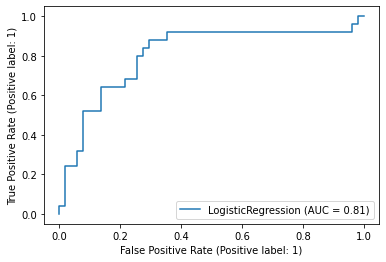

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(mm,x_test,y_test)

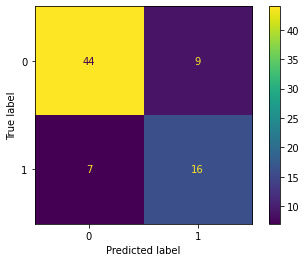

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(yp,y_test)
d=ConfusionMatrixDisplay(cm).plot()